In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
credit_loss = pd.Series(np.random.beta(1.47, 863.24, size=10000))
#credit_loss = np.random.beta(1.47, 863.24, size=10000)

In [53]:
np.quantile(credit_loss, 0.9997)*500

6.33661133762298

<AxesSubplot:ylabel='Count'>

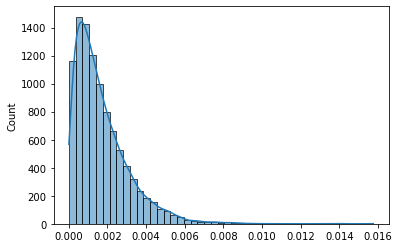

In [29]:
sns.histplot(credit_loss, kde=True, bins=45)

In [8]:
market_loss = pd.Series(np.random.normal(-0.01, 0.49, 10000))

In [54]:
np.quantile(market_loss, 0.9997)

1.6459520455551493

<AxesSubplot:ylabel='Count'>

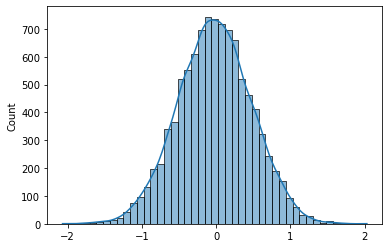

In [30]:
sns.histplot(market_loss, kde=True, bins=45)

In [55]:
op_loss = pd.Series(np.random.lognormal(-6.51, 0.07, 10000))
op_loss.describe()


count    10000.000000
mean         0.001494
std          0.000105
min          0.001125
25%          0.001421
50%          0.001491
75%          0.001560
max          0.001962
dtype: float64

In [58]:
np.quantile(op_loss,0.90)*1000

1.6329172995720946

<AxesSubplot:ylabel='Count'>

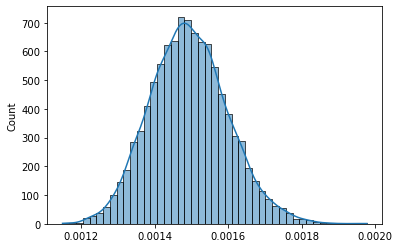

In [31]:
sns.histplot(op_loss, kde=True, bins=45)

In [13]:
test = pd.concat([credit_loss,market_loss, op_loss], axis=1)
test.rename(columns={0: "Credit Risk", 1: "Market Risk", 2:"Operational Risk"})
#df.rename(columns={"A": "a", "B": "c"})

,Credit Risk,Market Risk,Operational Risk
0,0.000231,-0.394448,0.001376
1,0.000566,0.482702,0.001419
2,0.001694,0.631692,0.001624
3,0.000232,0.143916,0.001707
4,0.000204,1.552018,0.001462
...,...,...,...
9995,0.000397,-0.493925,0.001479
9996,0.004201,-0.251586,0.001403
9997,0.002478,-1.217257,0.001428
9998,0.000736,-0.523363,0.001285


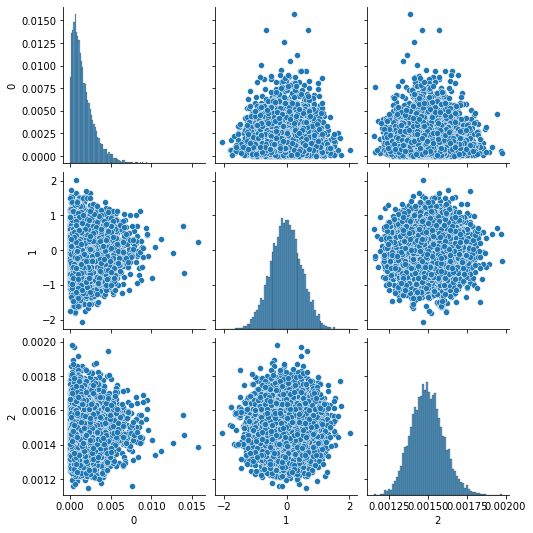

In [34]:
sns.pairplot(test)

<AxesSubplot:>

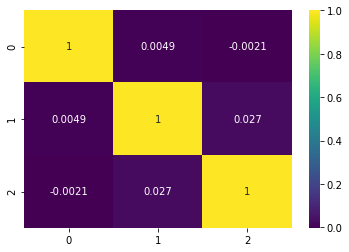

In [38]:
sns.heatmap(test.corr(), cmap='viridis', annot=True)

In [16]:
from copulae import GaussianCopula
from copulae import StudentCopula

In [17]:
_, ndim = test.shape

In [18]:
g_cop = GaussianCopula(dim=ndim)  # initializing the copula
g_cop.fit(test)  # fit the copula to the data

                  0             1             2
count  10000.000000  10000.000000  10000.000000
mean       0.500000      0.500000      0.500000
std        0.288661      0.288661      0.288661
min        0.000100      0.000100      0.000100
25%        0.250050      0.250050      0.250050
50%        0.500000      0.500000      0.500000
75%        0.749950      0.749950      0.749950
max        0.999900      0.999900      0.999900


In [19]:
g_cop.summary()

1.000000,0.002505,0.000100
0.002505,1.000000,0.027083
0.000100,0.027083,1.000000


<AxesSubplot:ylabel='Count'>

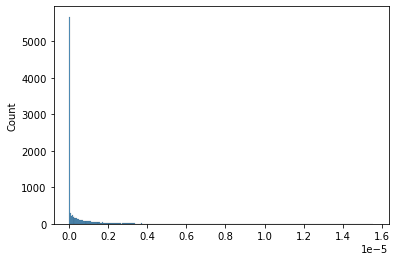

In [20]:
sns.histplot(g_cop.cdf(test))

In [21]:
np.quantile(g_cop.cdf(test),0.9)

1.4747971941439266e-06

In [22]:
degrees_of_freedom = 10  # some random number, unnecessary to specify df but done for demonstration purposes
t_cop = StudentCopula(dim=ndim, df=degrees_of_freedom)
t_cop.fit(test)

                  0             1             2
count  10000.000000  10000.000000  10000.000000
mean       0.500000      0.500000      0.500000
std        0.288661      0.288661      0.288661
min        0.000100      0.000100      0.000100
25%        0.250050      0.250050      0.250050
50%        0.500000      0.500000      0.500000
75%        0.749950      0.749950      0.749950
max        0.999900      0.999900      0.999900


In [23]:
t_cop.summary()

1.000000,0.002627,0.000237
0.002627,1.000000,0.027213
0.000237,0.027213,1.000000


In [24]:
g_cop.log_lik(test)

3.688022583950746

In [25]:
g_cop.rho

array([2.39183007e-03, 9.55383196e-05, 2.58626830e-02])

In [26]:
g_cop.tau

array([1.59455463e-03, 6.36922131e-05, 1.72433700e-02])

<Axes3DSubplot:>

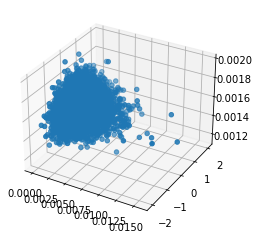

In [27]:
from copulas.visualization import scatter_3d
scatter_3d(test)